In [1]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy

In [2]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset"

In [3]:
x = np.load(dir_path + "/SCG_x.npy", allow_pickle= True)
y = np.load(dir_path + "/SCG_z.npy", allow_pickle= True)
z = np.load(dir_path + "/SCG_y.npy", allow_pickle= True)

In [4]:
tr_x = obspy.core.trace.Trace(x[3]).detrend("linear").taper(max_percentage=0.05, type="hann")
tr_y = obspy.core.trace.Trace(y[3]).detrend("linear").taper(max_percentage=0.05, type="hann")
tr_z = obspy.core.trace.Trace(z[3]).detrend("linear").taper(max_percentage=0.05, type="hann")

## What is wavelet transform:

### What’s a Wavelet?
A Wavelet is a wave-like oscillation that is localized in time, an example is given below. Wavelets have two basic properties: scale and location. Scale (or dilation) defines how “stretched” or “squished” a wavelet is.

The parameter “a” in the expression above sets the scale of the wavelet. If we decrease its value the wavelet will look more squished. This in turn can capture high frequency information. Conversely, increasing the value of “a” will stretch the wavelet and captures low frequency information.

The parameter “b” defines the location of the wavelet. Decreasing “b” will shift the wavelet to the left. Increasing “b” will shift it to the right. Location is important because unlike waves, wavelets are only non-zero in a short interval. 

The basic idea is to compute how much of a wavelet is in a signal for a particular scale and location. For those familiar with convolutions, that is exactly what this is. A signal is convolved with a set wavelets at a variety of scales.


In other words, we pick a wavelet of a particular scale (like the blue wavelet in the gif above). Then, we slide this wavelet across the entire signal i.e. vary its location, where at each time step we multiply the wavelet and signal. The product of this multiplication gives us a coefficient for that wavelet scale at that time step. We then increase the wavelet scale (e.g. the red and green wavelets) and repeat the process.

Wavelet transform can extract local spectral and temporal information simultaneously

The smaller scales such as 2⁰ and 2¹ correspond to high frequencies thus predominantly consist of noise in this example. 



### wavelet transform

In [5]:
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt
from obspy.io.xseed import Parser
from obspy.signal import PPSD

import pywt 

#### for x component

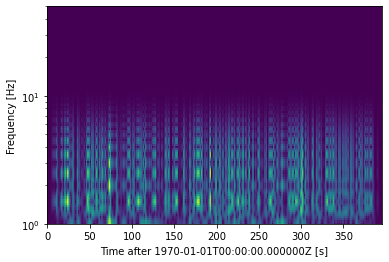

In [13]:
npts = tr_x.stats.npts
dt = tr_x.stats.delta
t = np.linspace(0, npts*dt, npts)
f_min = 1
f_max = 50

scalogram = cwt(tr_x.data, dt, 10, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0])
)

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr_x.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()

#### for y component

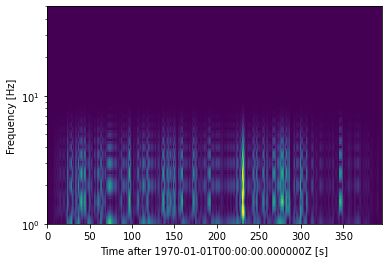

In [14]:
npts_y = tr_y.stats.npts
dt_y = tr_y.stats.delta
t = np.linspace(0, npts_y * dt_y, npts_y)
f_min = 1
f_max = 50

scalogram_y = cwt(tr_y.data, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram_y.shape[0])
)

ax.pcolormesh(x, y, np.abs(scalogram_y), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr_y.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()

#### for z component

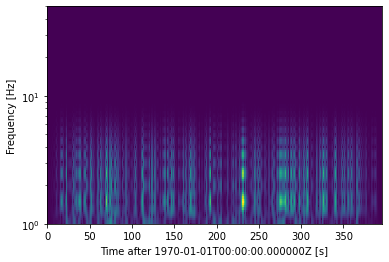

In [15]:
npts_z = tr_z.stats.npts
dt_z = tr_z.stats.delta
t = np.linspace(0, npts_z * dt_z, npts_z)
f_min = 1
f_max = 50

scalogram_z = cwt(tr_z.data, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram_z.shape[0])
)

ax.pcolormesh(x, y, np.abs(scalogram_z), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr_z.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()

In [16]:
def scalogram(f_min = 1, f_max = 512, signal = 0):
    
    for i in range(len(signal)):
        tr = obspy.core.trace.Trace(signal[i]).detrend("linear").taper(max_percentage=0.05, type="hann")

        npts = tr.stats.npts
        dt = tr.stats.delta
        t = np.linspace(0, npts* dt, npts)

        scalogram = cwt(tr.data, dt, 8, f_min, f_max)

        fig = plt.figure()
        ax = fig.add_subplot(111)

        x, y = np.meshgrid(t,
                       np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0])
                      )

        ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
        ax.set_xlabel("Time after %s [s]" % tr.stats.starttime)
        ax.set_ylabel("Frequency [Hz]")
        ax.set_yscale('log')
        ax.set_ylim(f_min, f_max)
        plt.show()


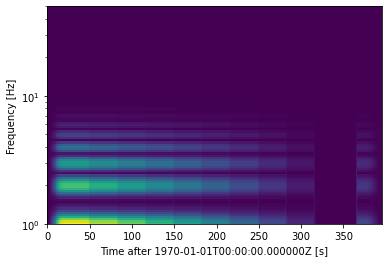

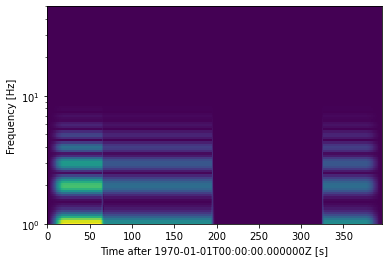

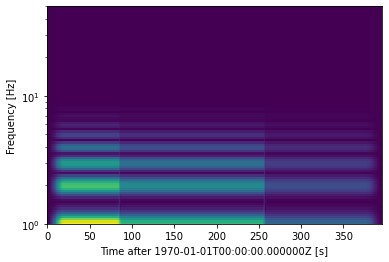

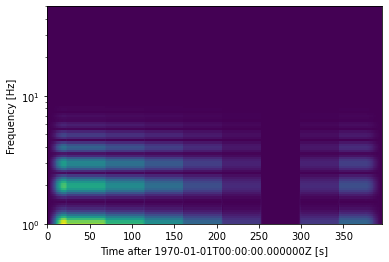

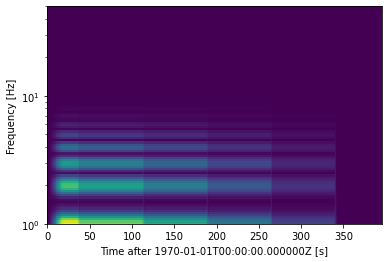

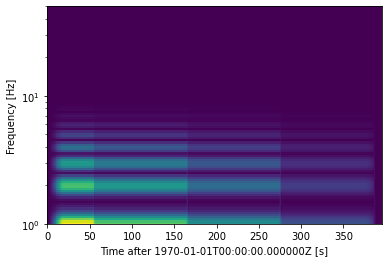

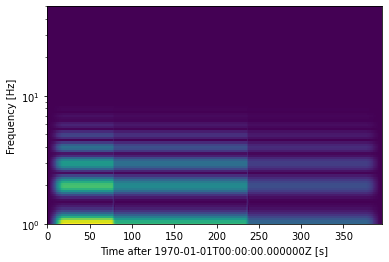

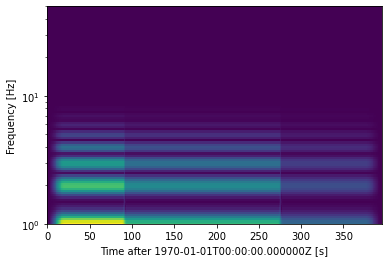

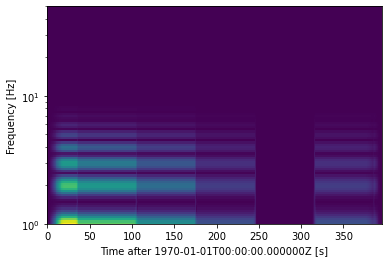

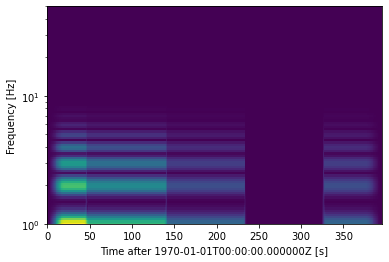

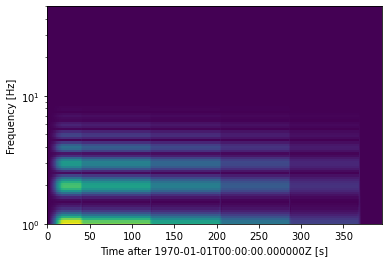

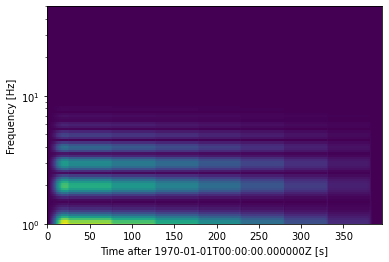

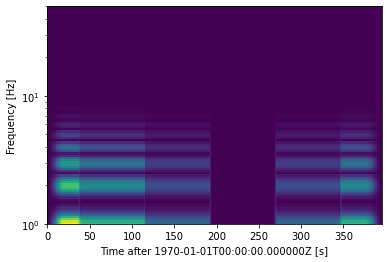

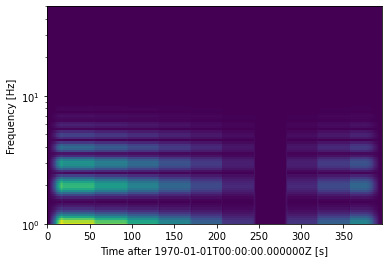

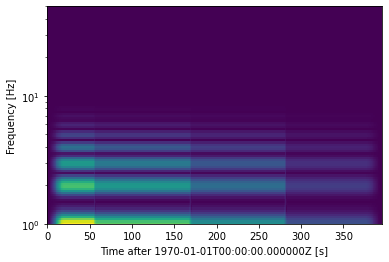

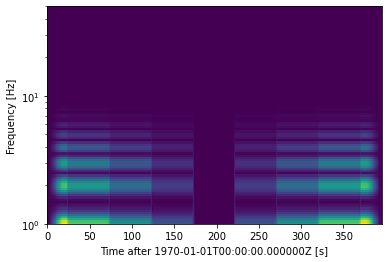

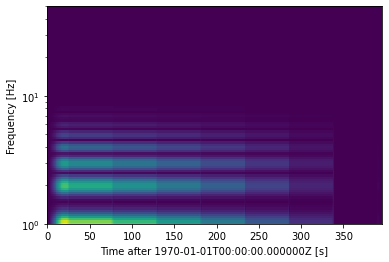

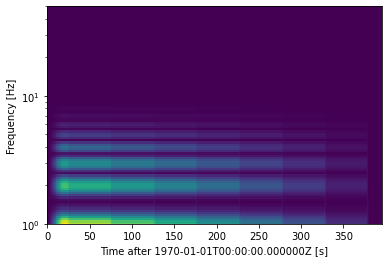

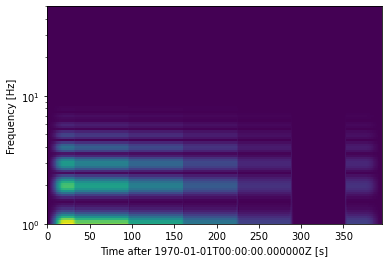

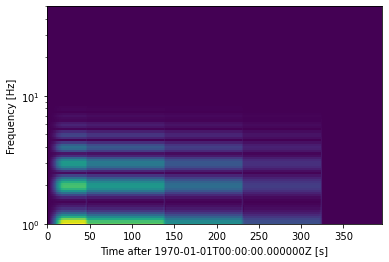

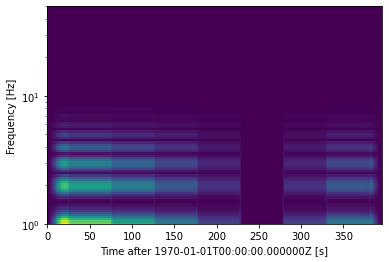

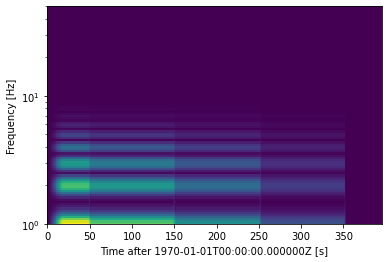

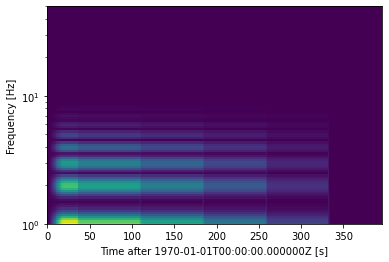

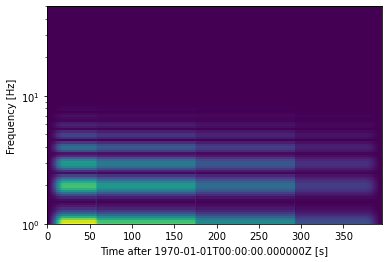

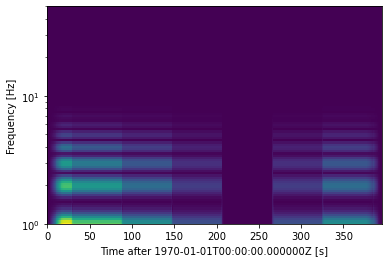

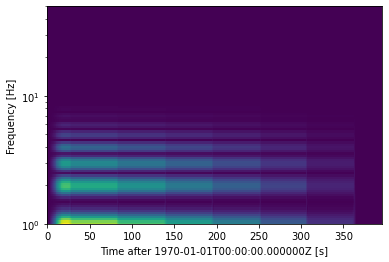

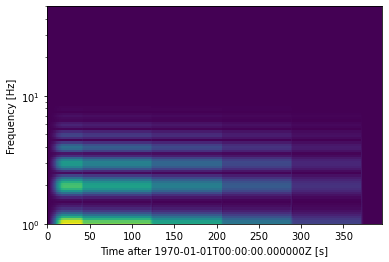

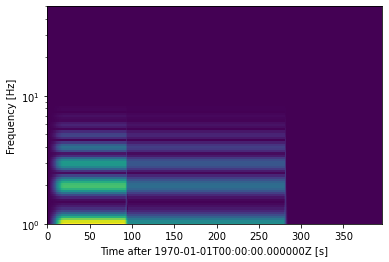

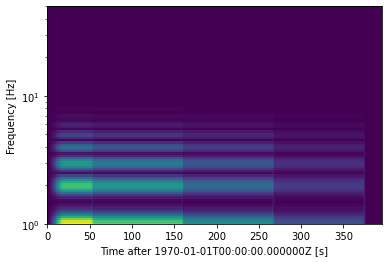

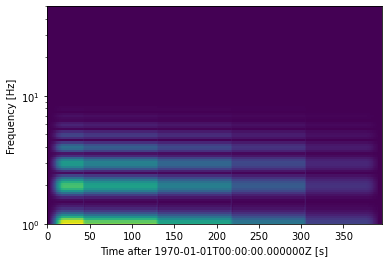

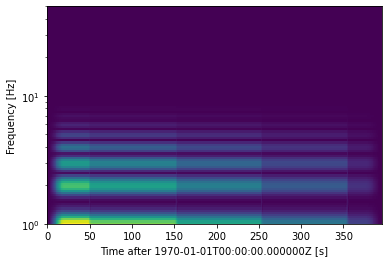

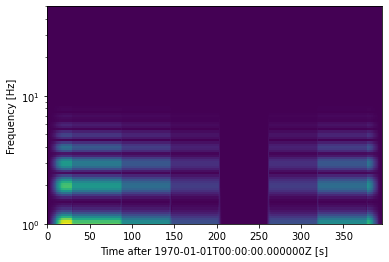

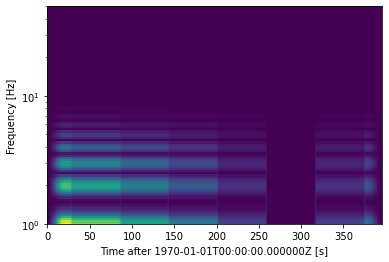

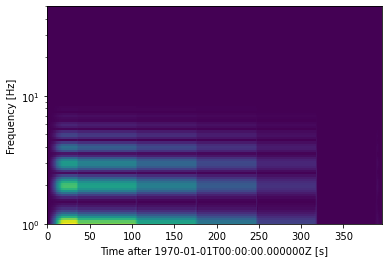

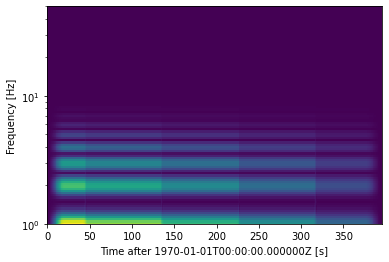

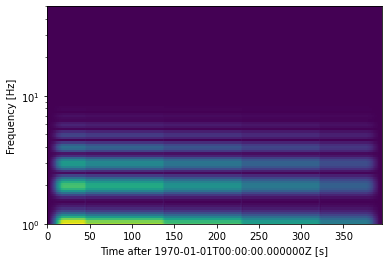

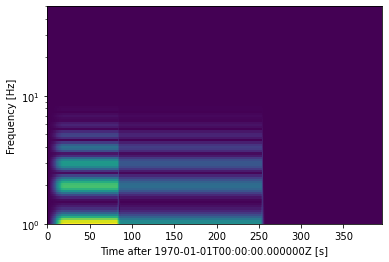

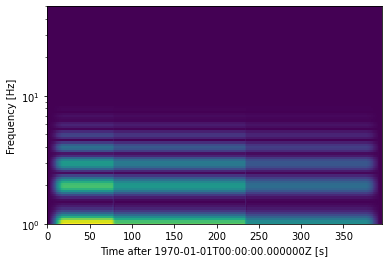

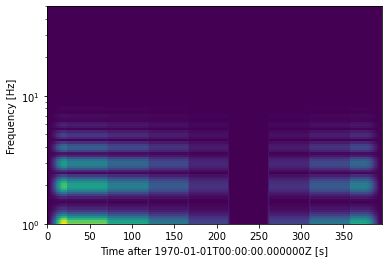

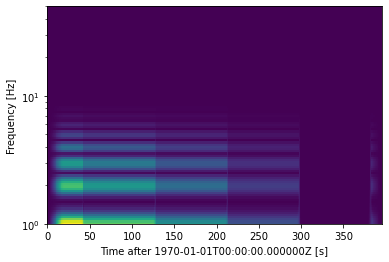

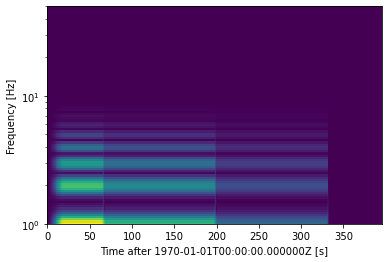

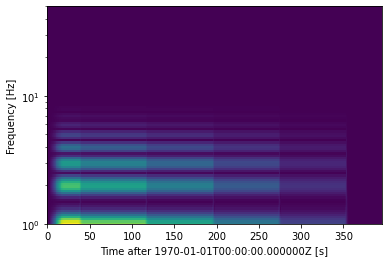

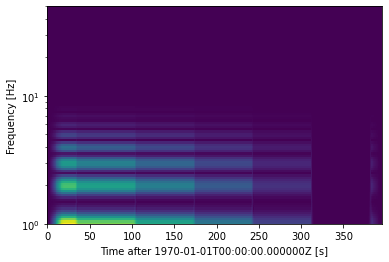

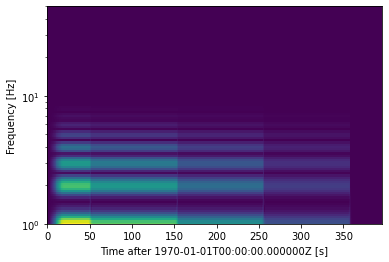

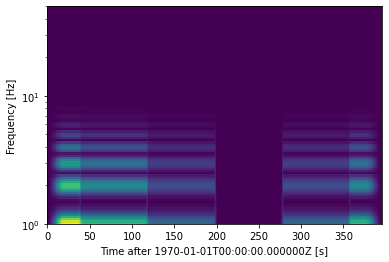

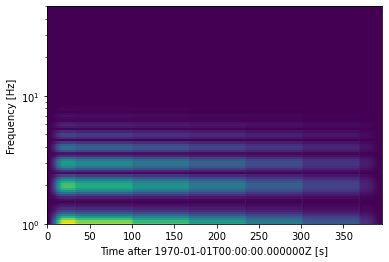

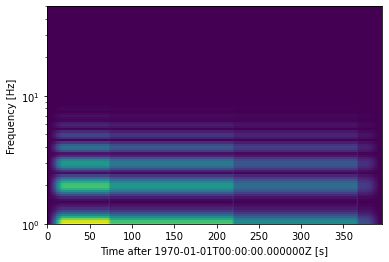

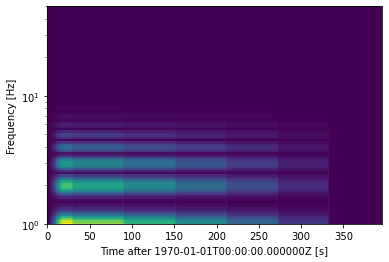

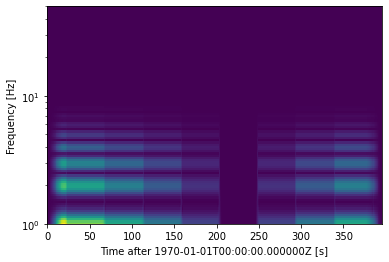

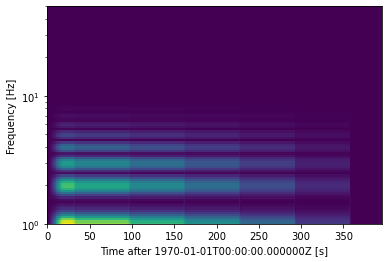

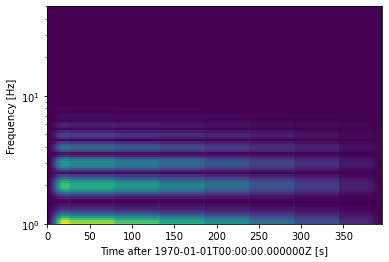

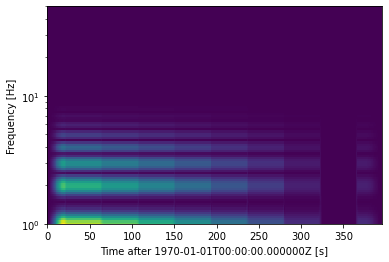

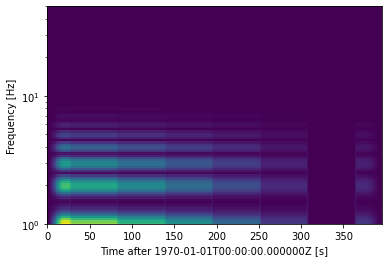

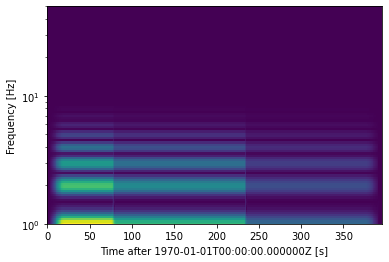

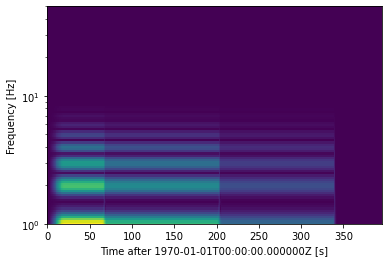

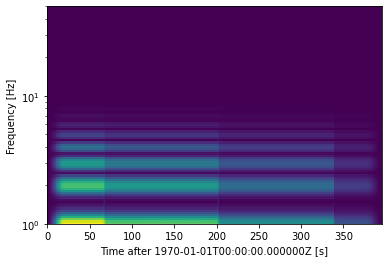

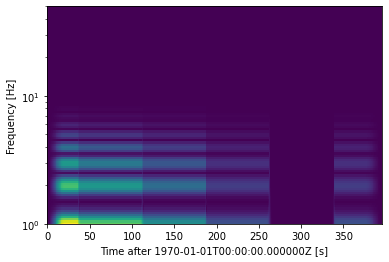

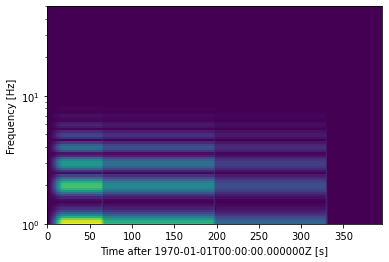

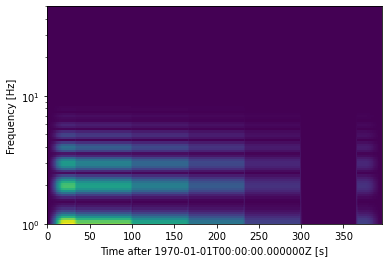

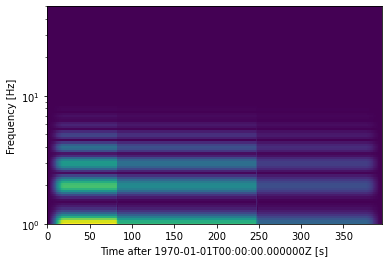

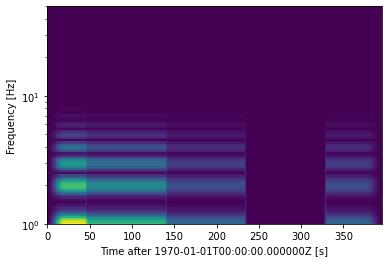

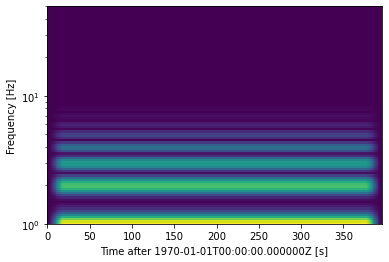

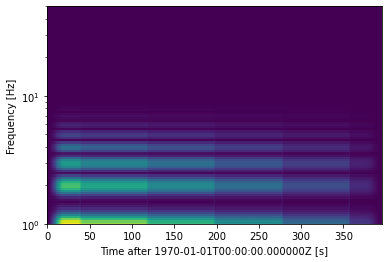

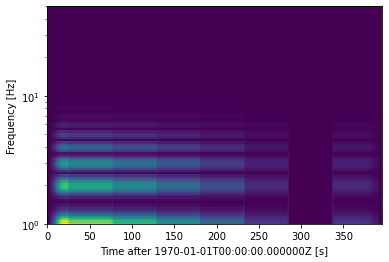

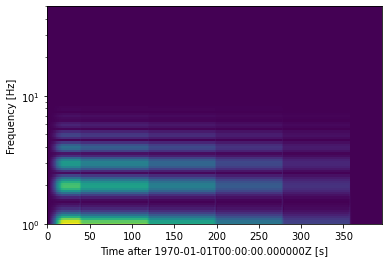

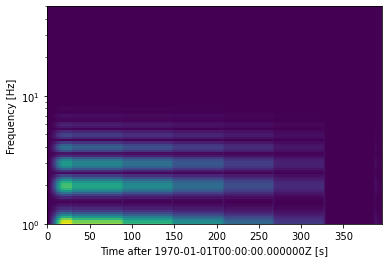

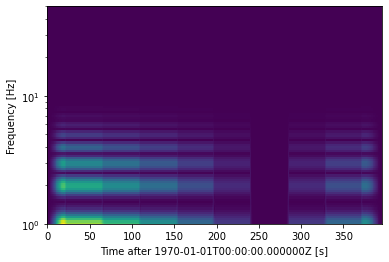

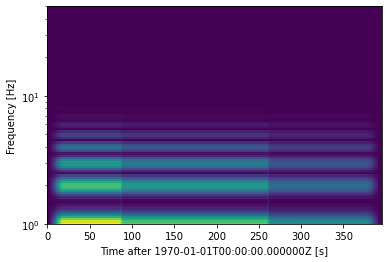

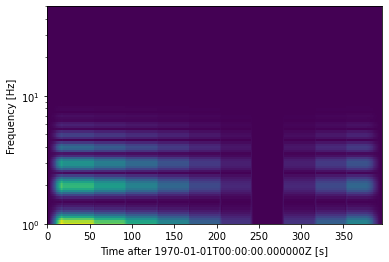

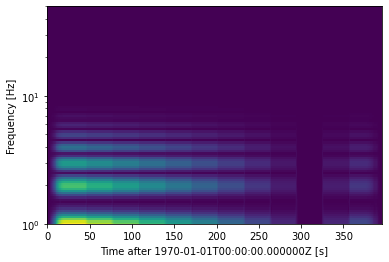

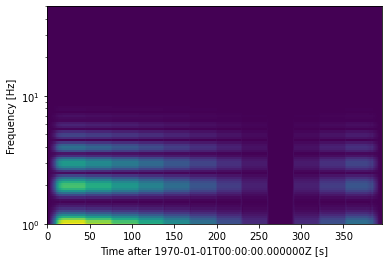

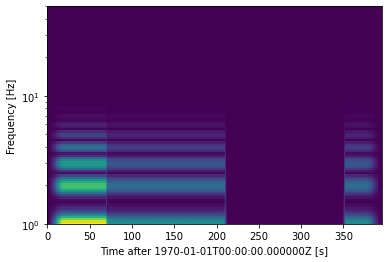

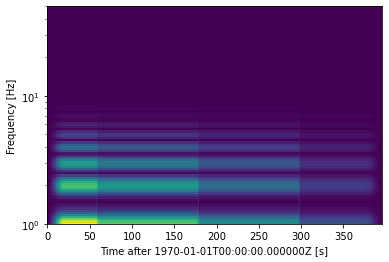

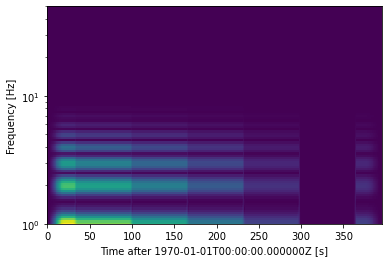

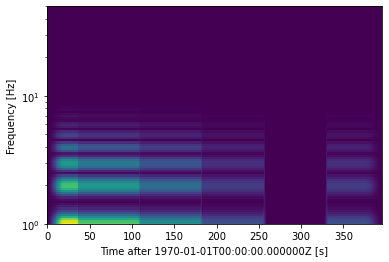

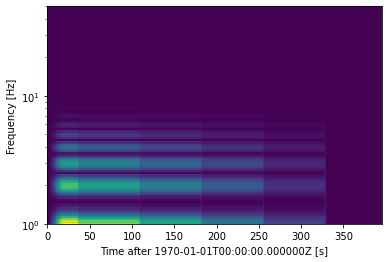

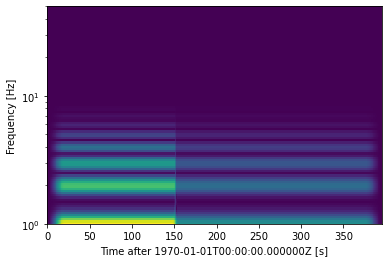

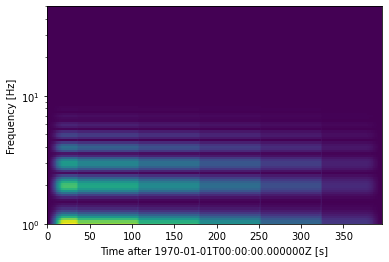

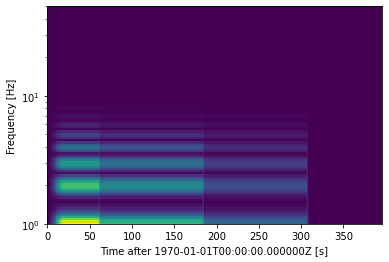

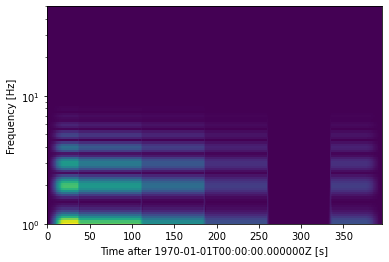

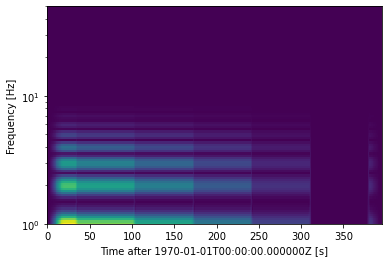

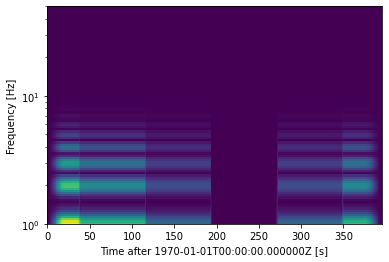

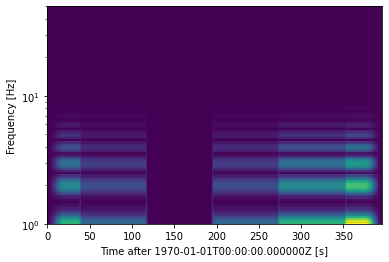

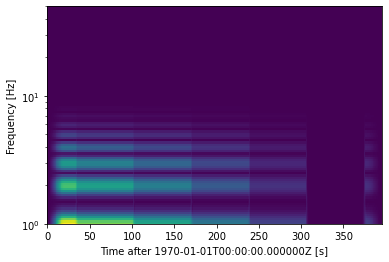

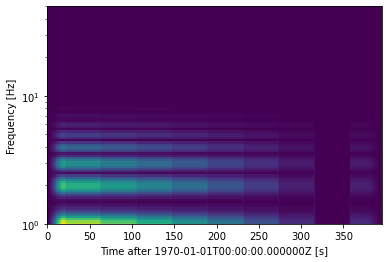

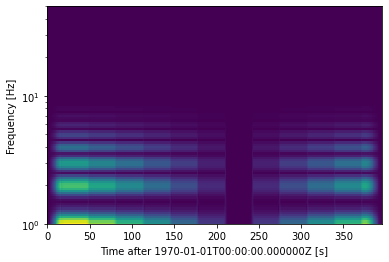

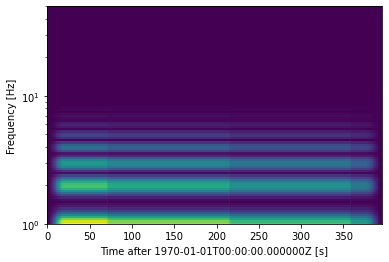

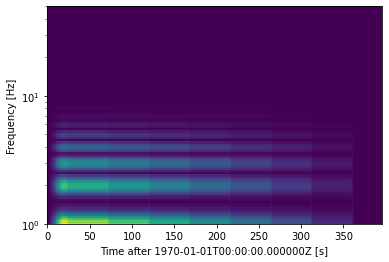

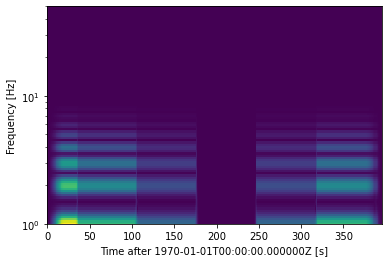

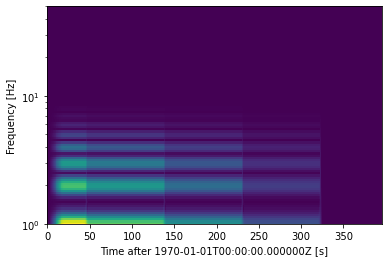

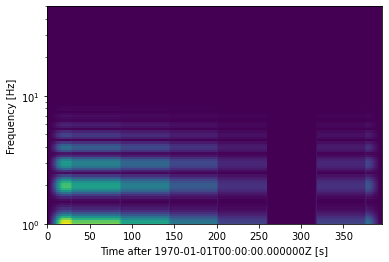

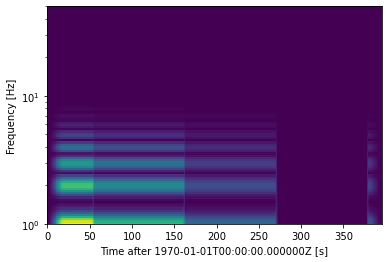

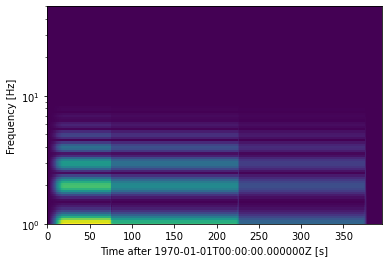

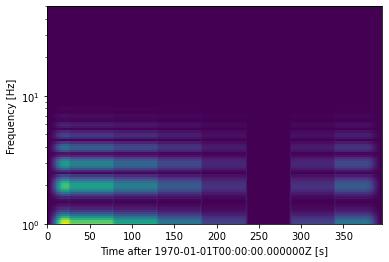

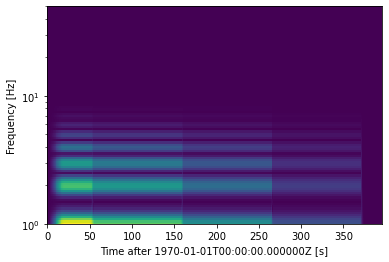

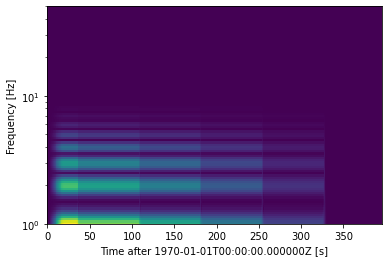

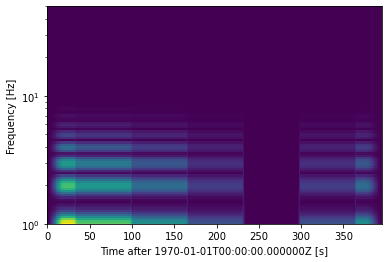

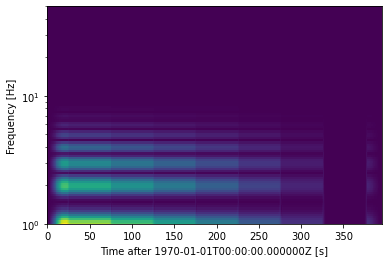

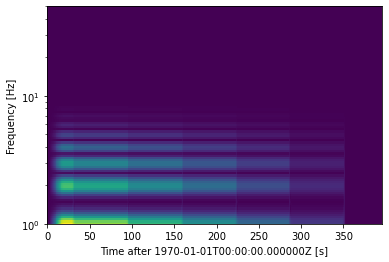

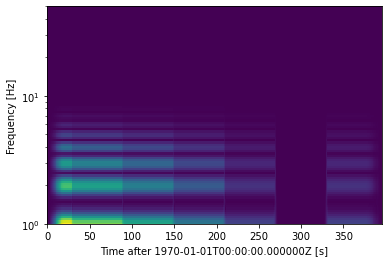

In [17]:
scalogram(signal = y)

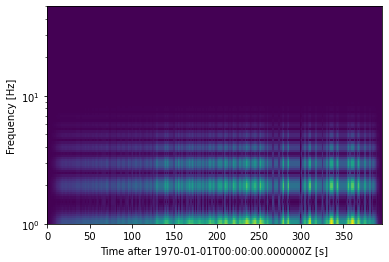

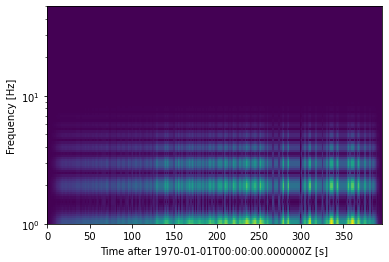

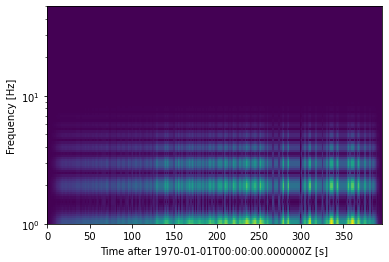

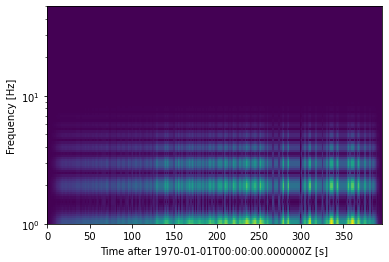

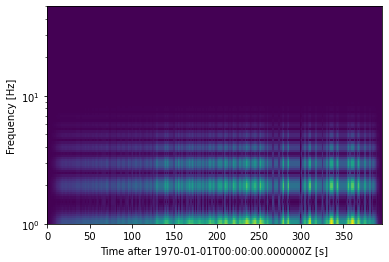

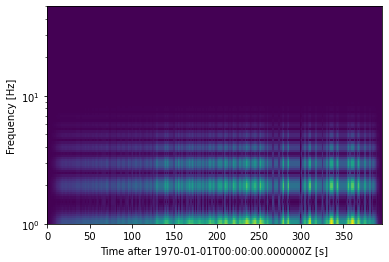

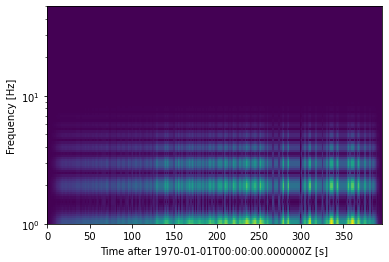

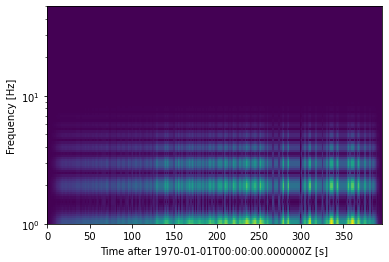

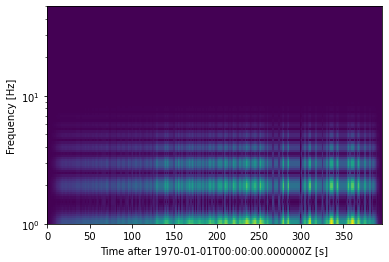

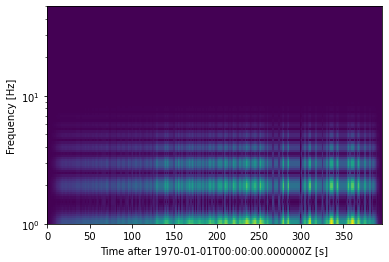

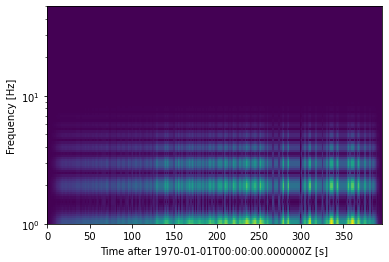

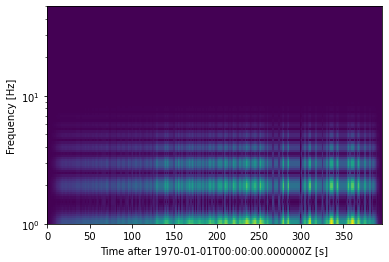

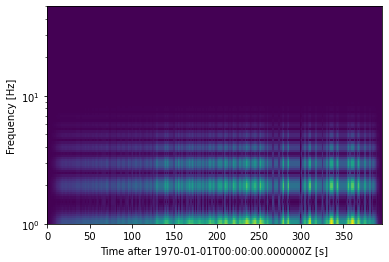

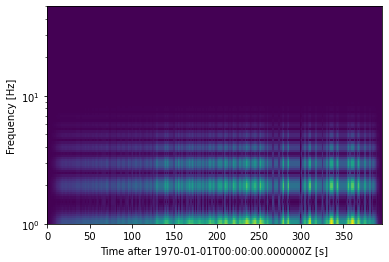

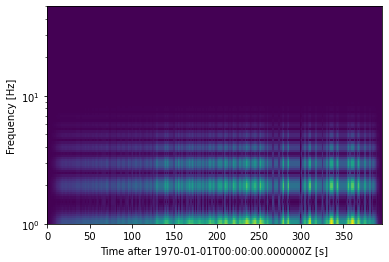

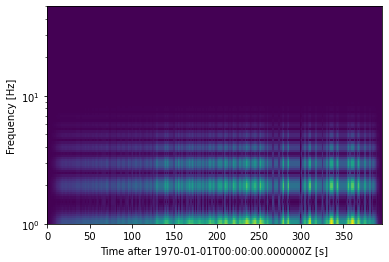

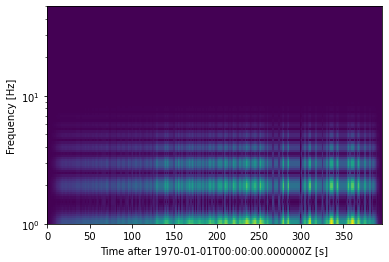

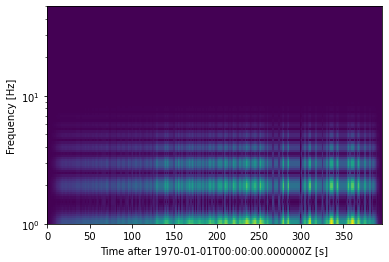

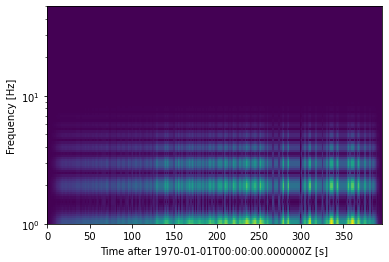

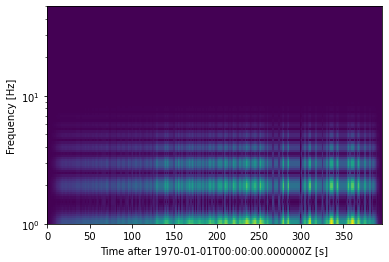

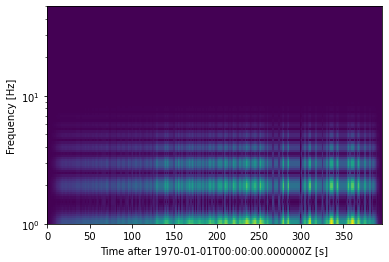

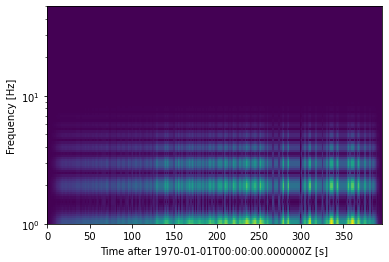

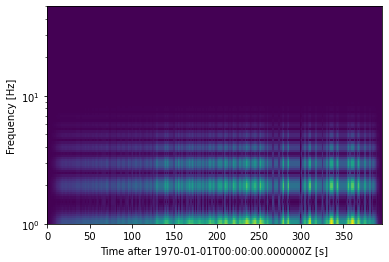

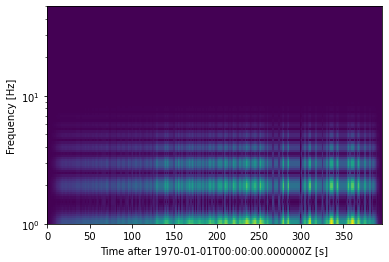

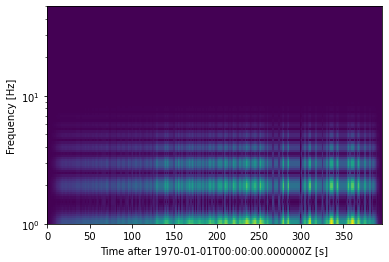

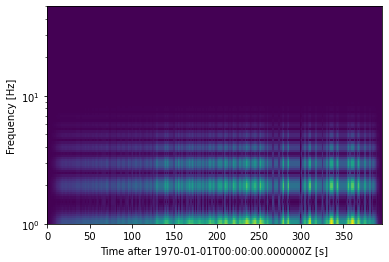

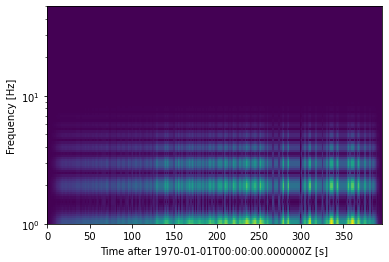

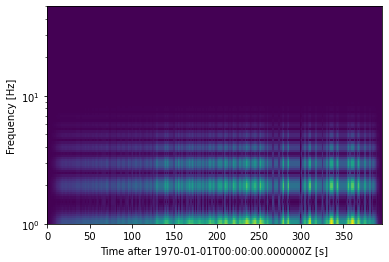

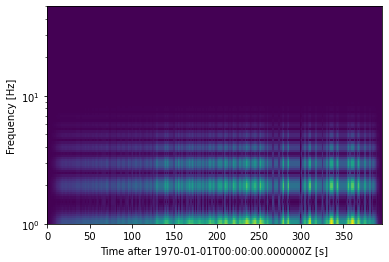

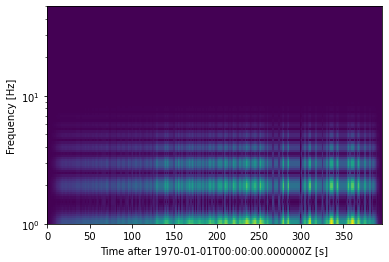

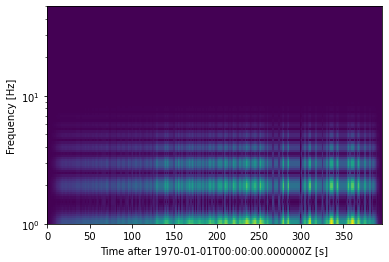

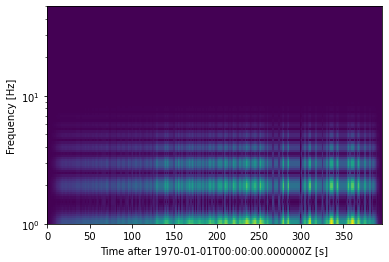

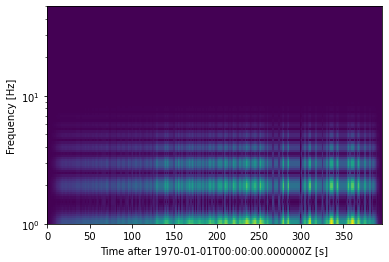

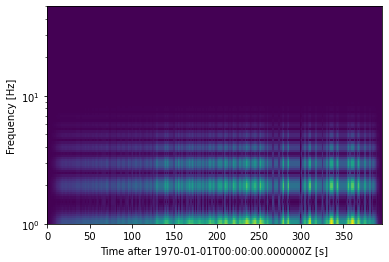

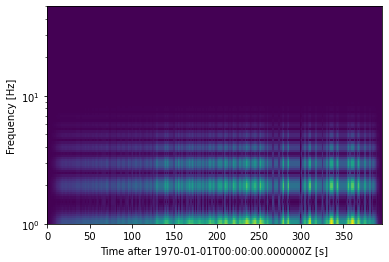

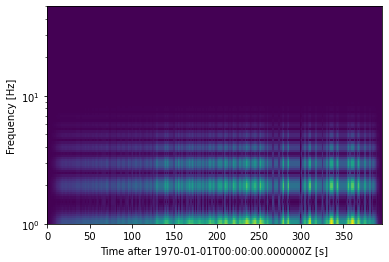

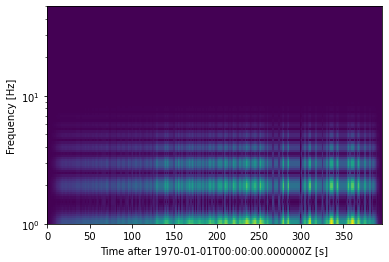

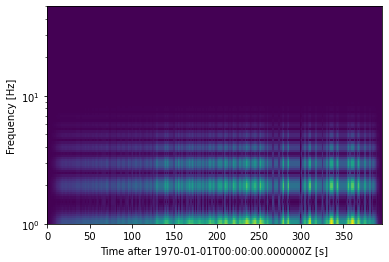

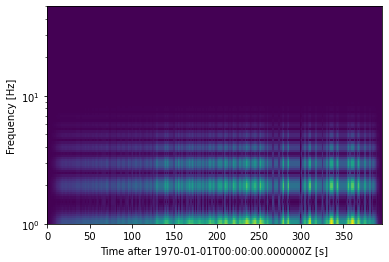

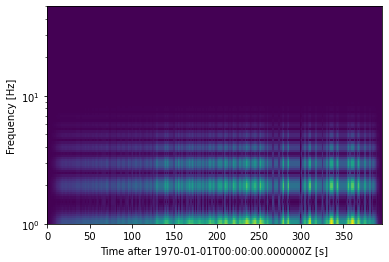

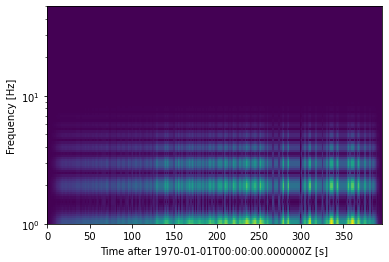

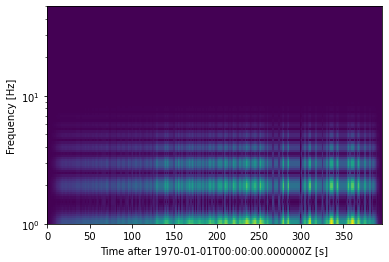

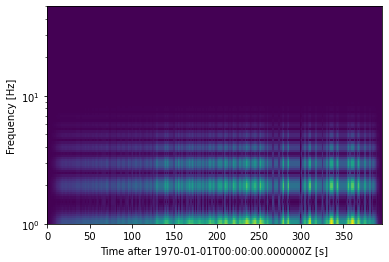

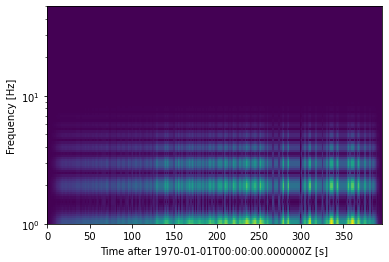

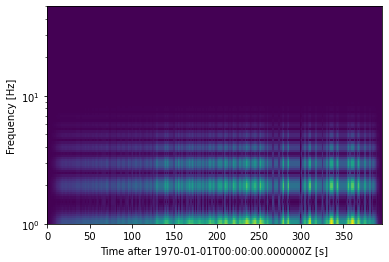

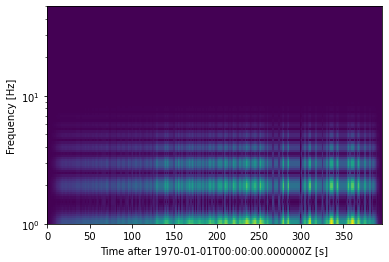

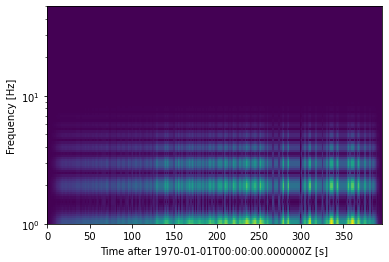

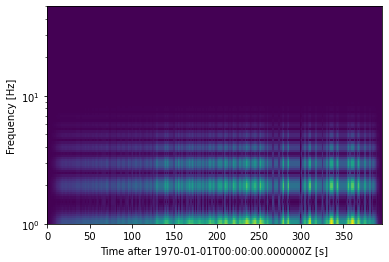

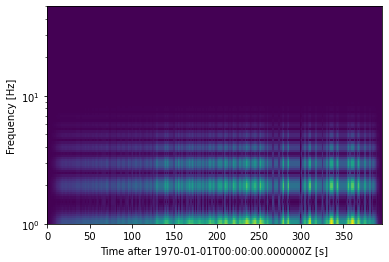

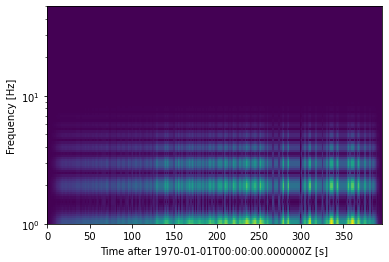

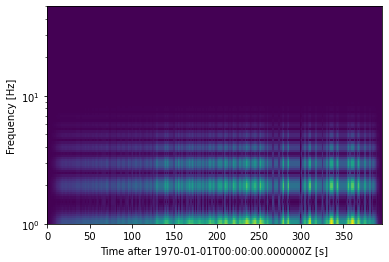

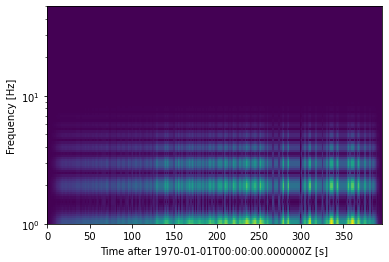

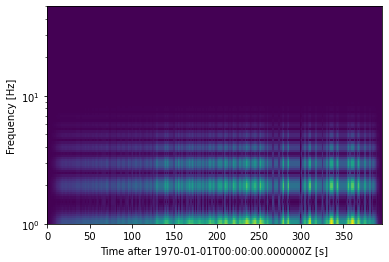

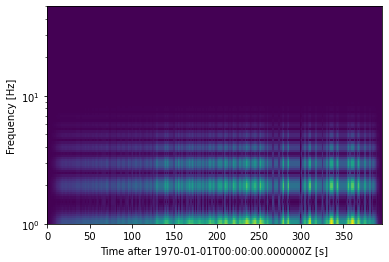

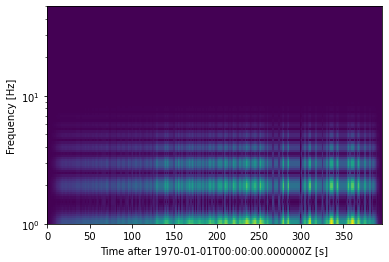

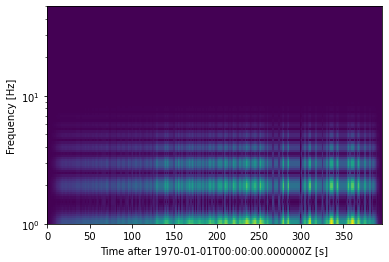

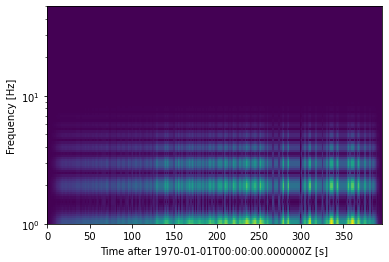

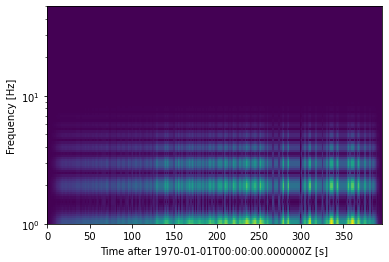

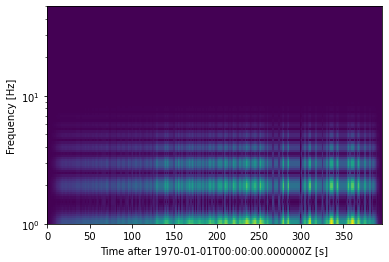

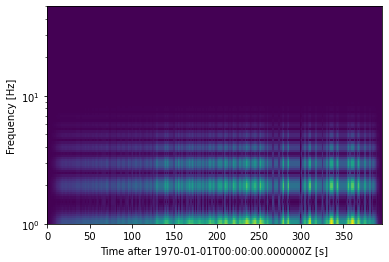

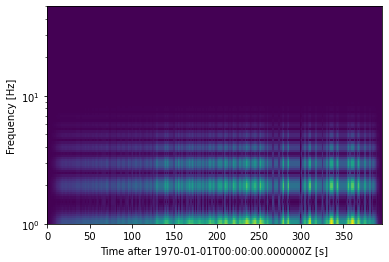

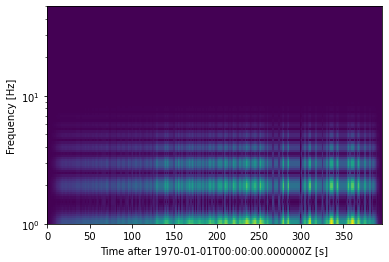

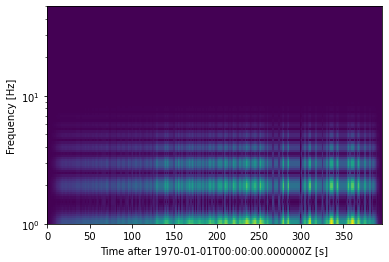

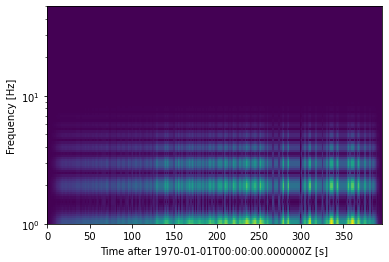

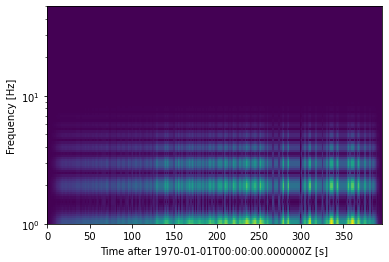

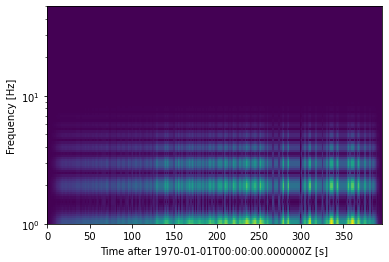

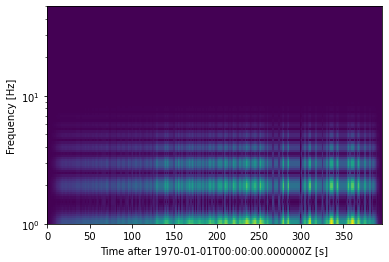

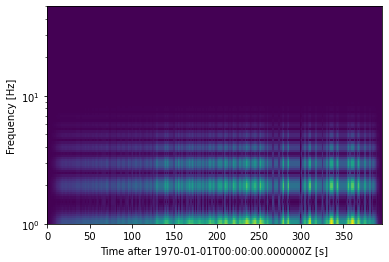

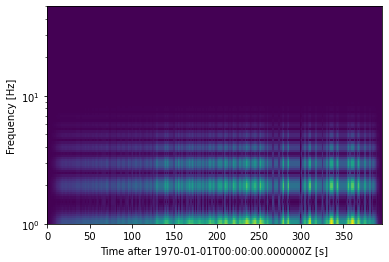

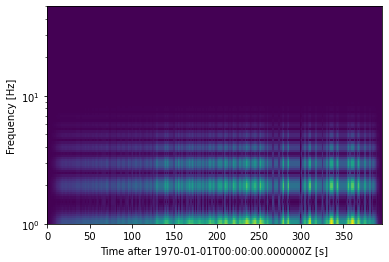

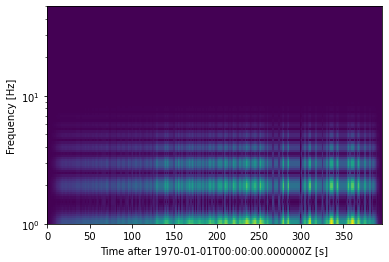

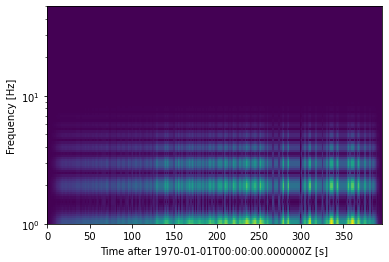

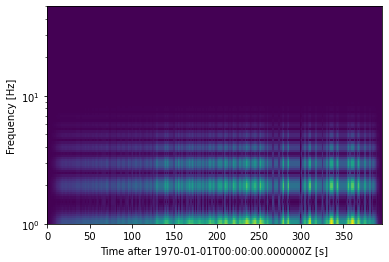

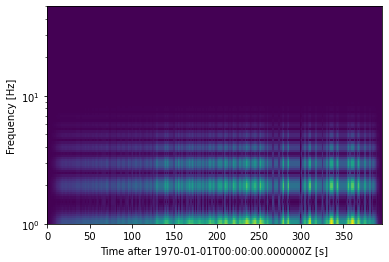

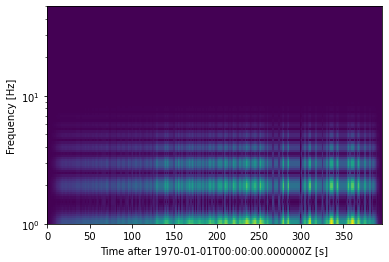

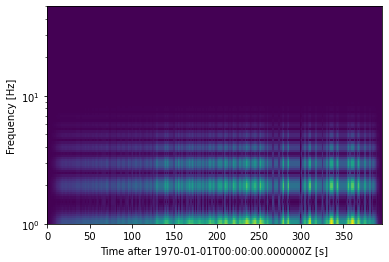

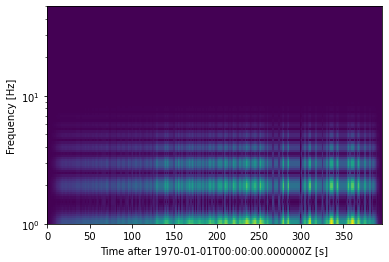

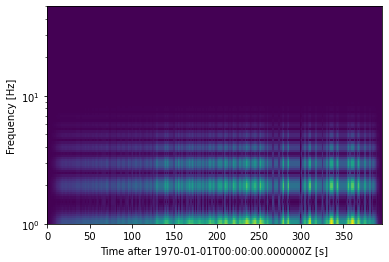

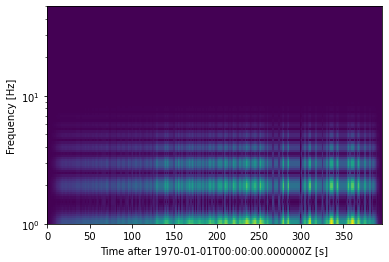

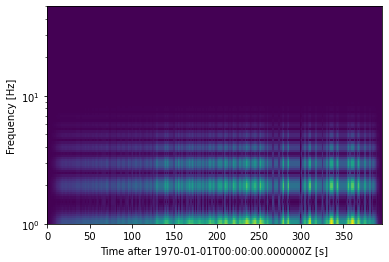

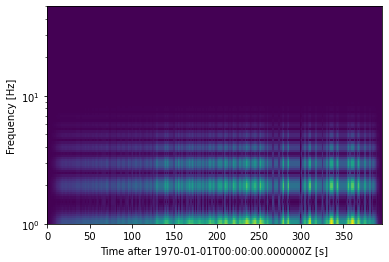

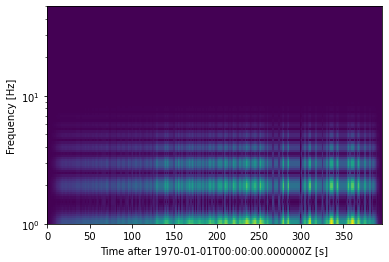

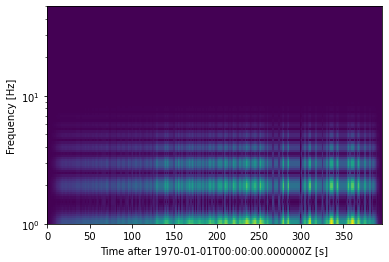

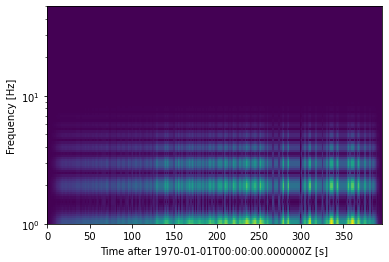

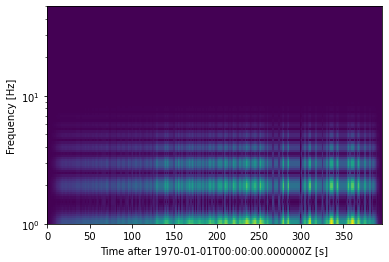

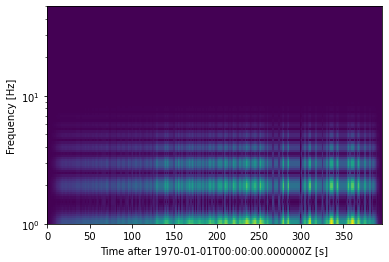

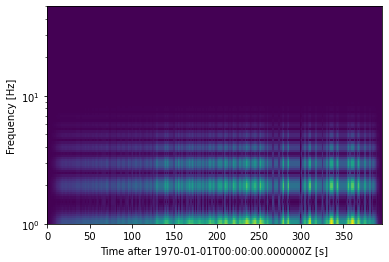

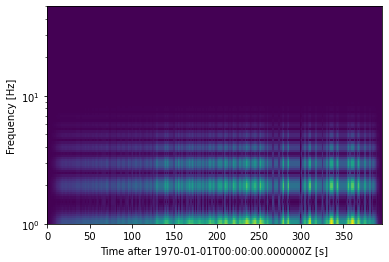

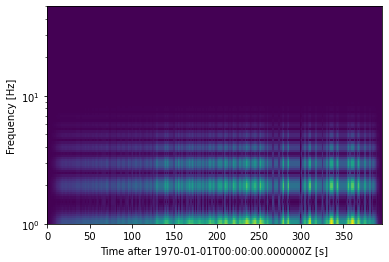

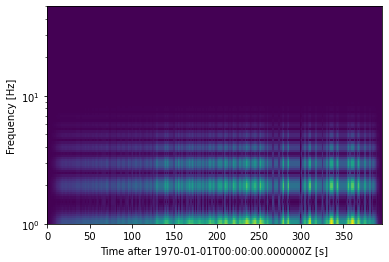

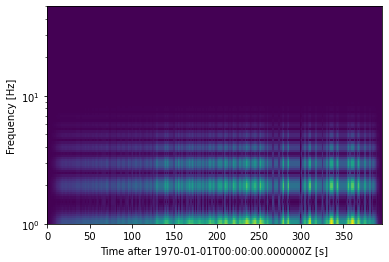

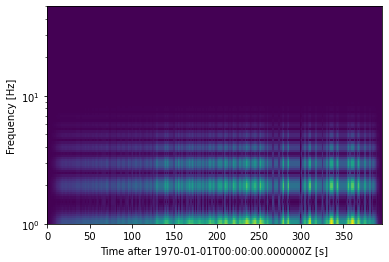

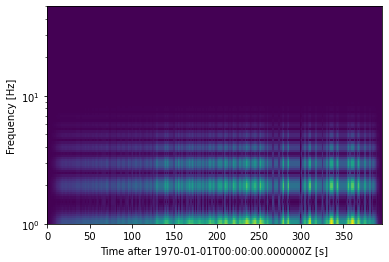

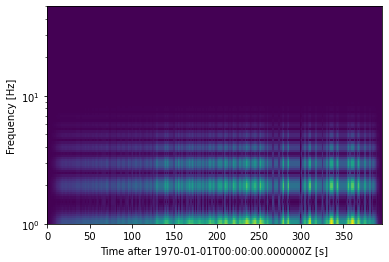

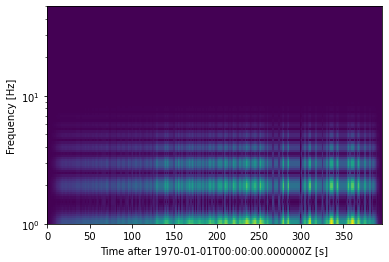

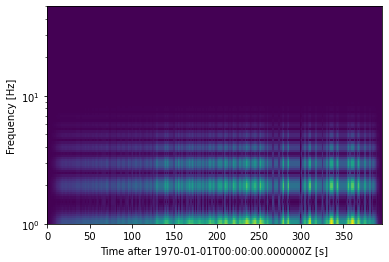

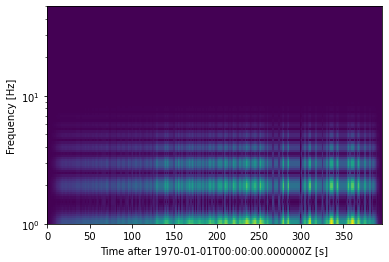

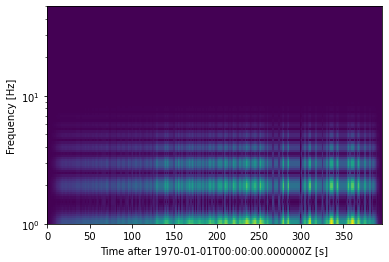

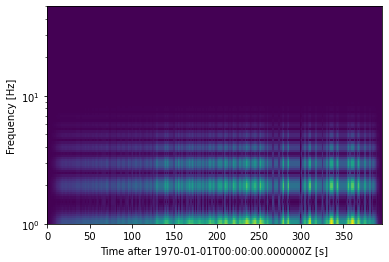

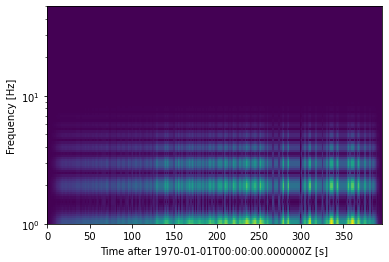

In [18]:
scalogram(signal = x)

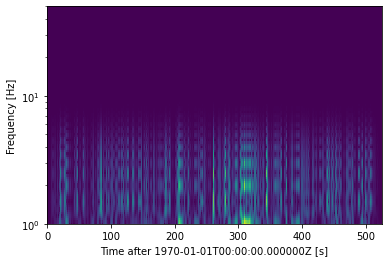

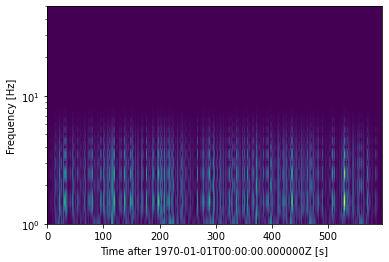

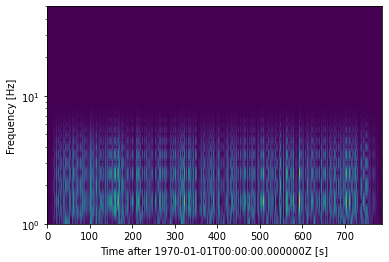

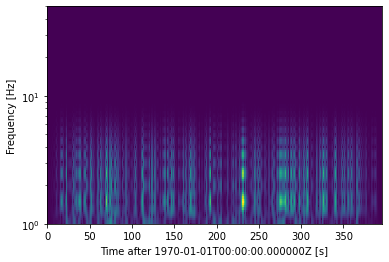

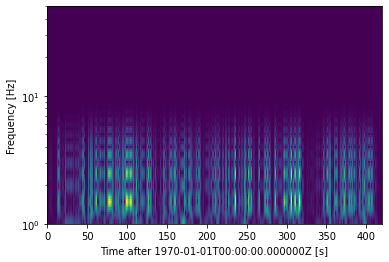

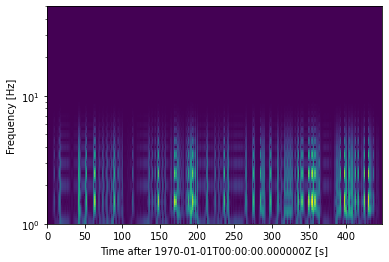

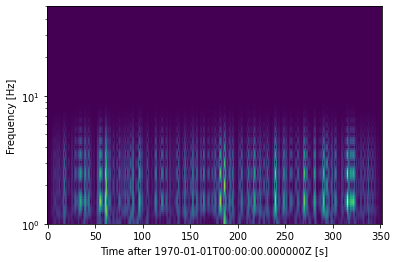

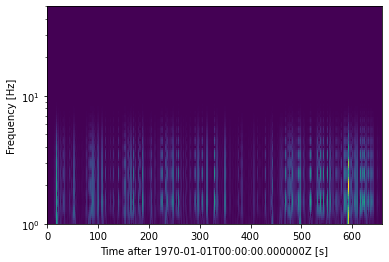

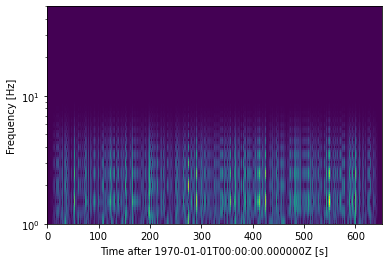

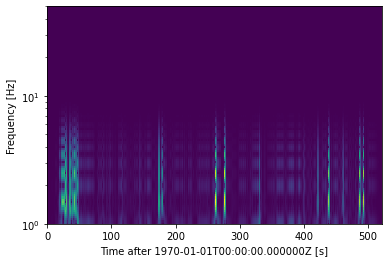

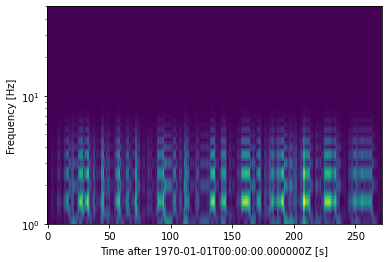

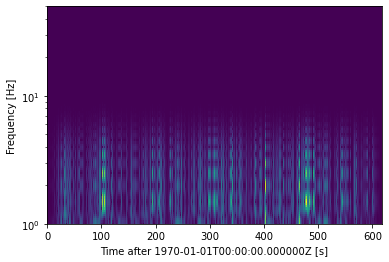

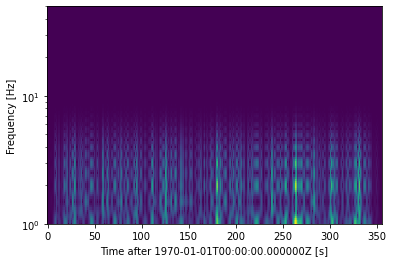

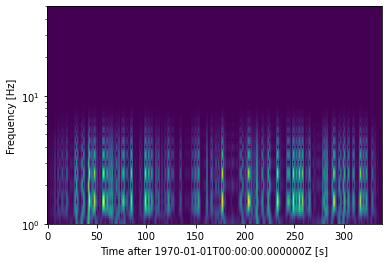

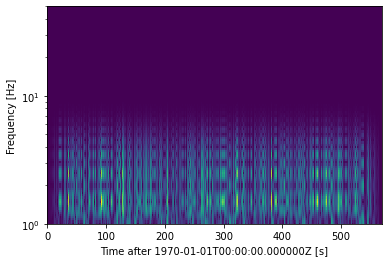

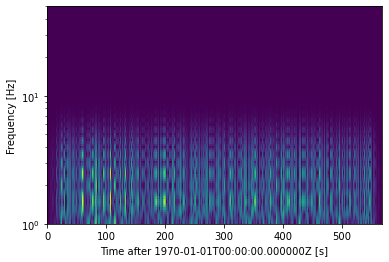

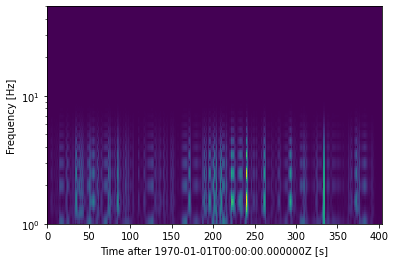

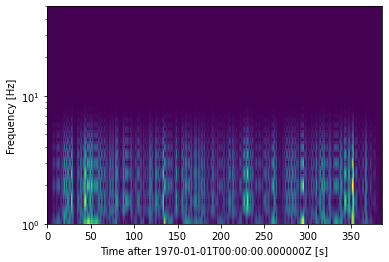

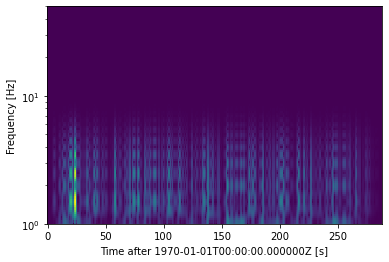

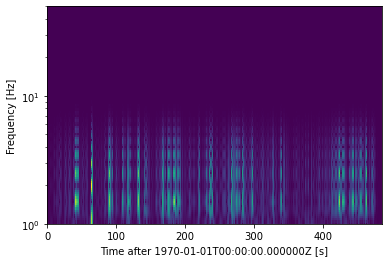

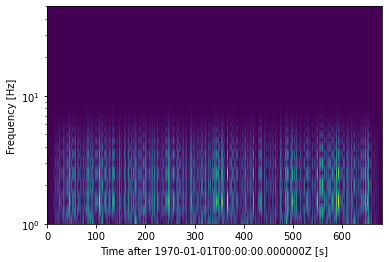

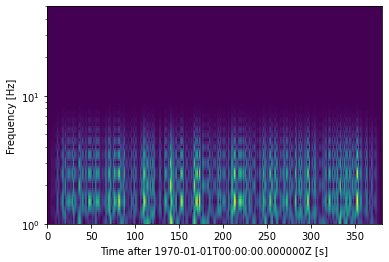

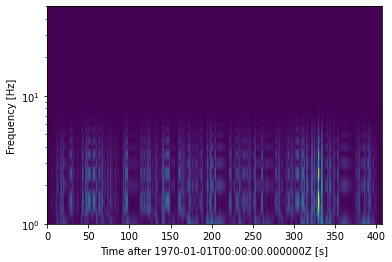

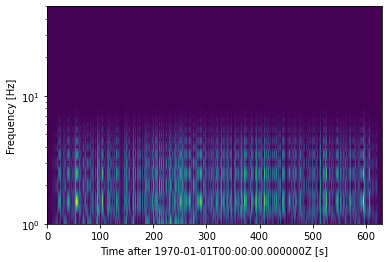

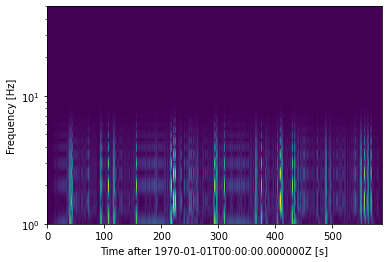

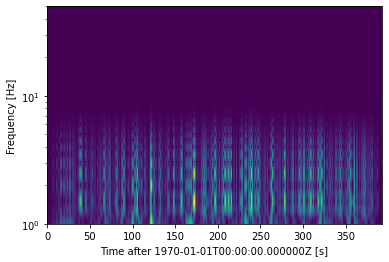

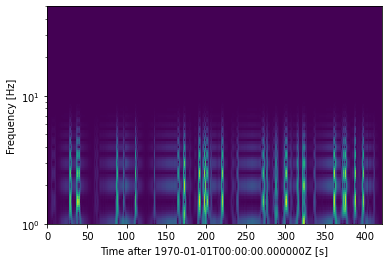

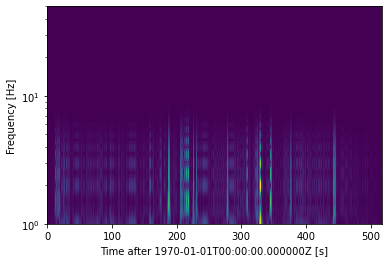

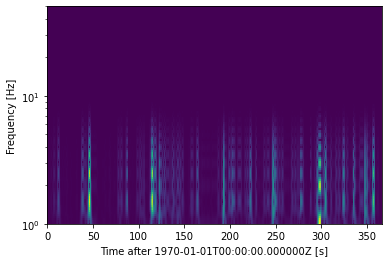

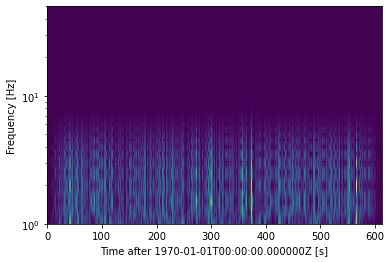

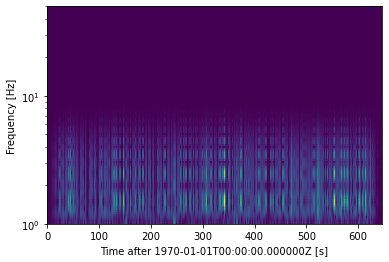

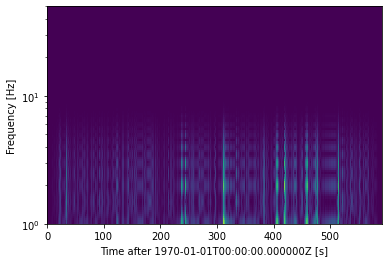

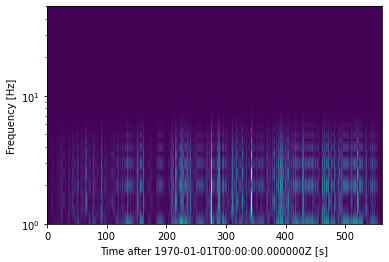

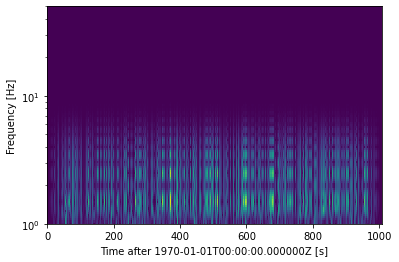

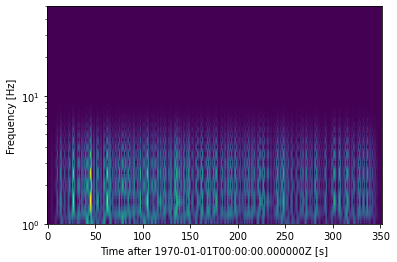

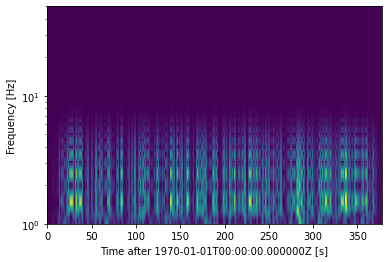

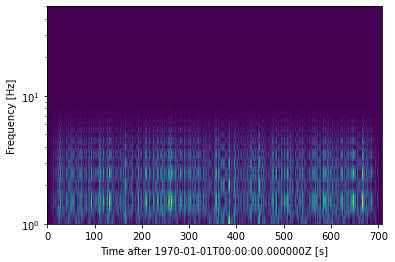

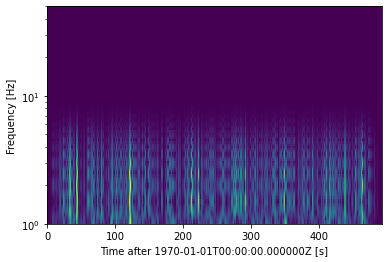

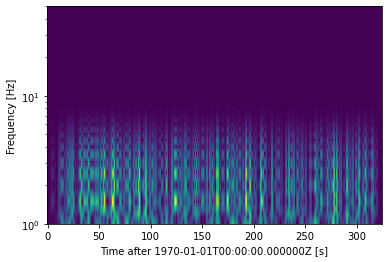

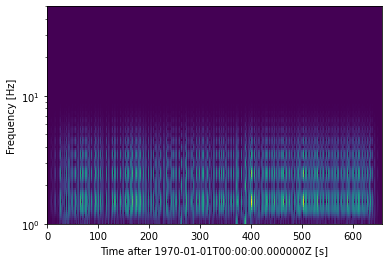

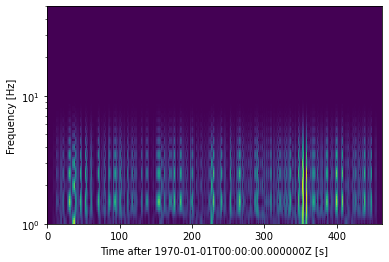

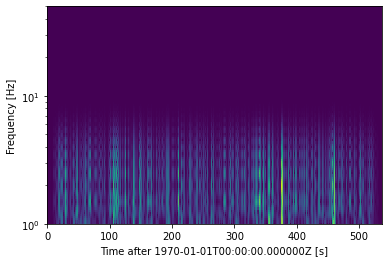

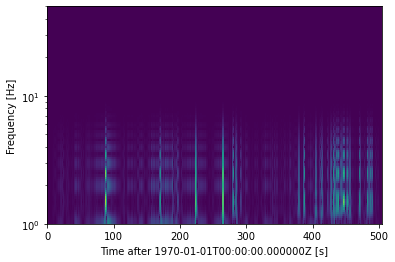

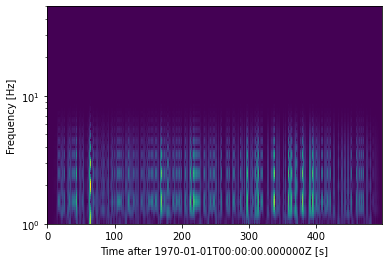

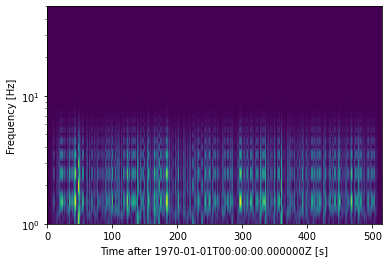

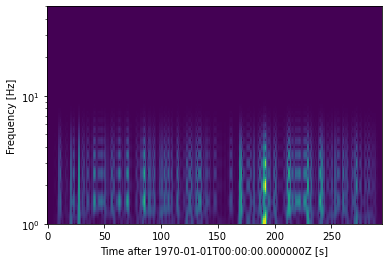

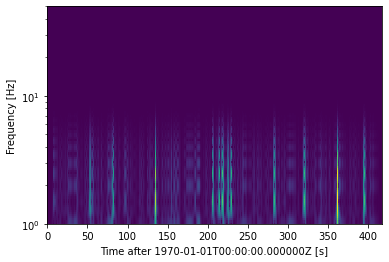

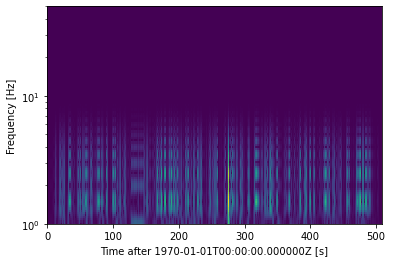

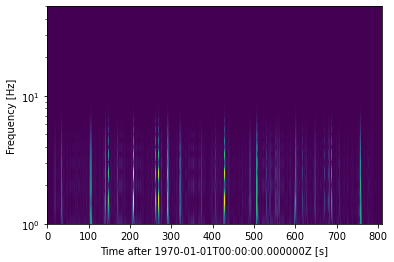

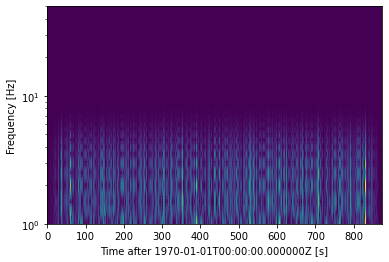

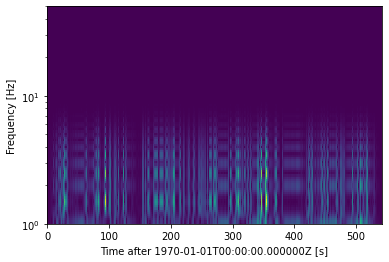

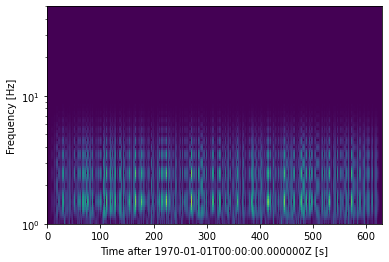

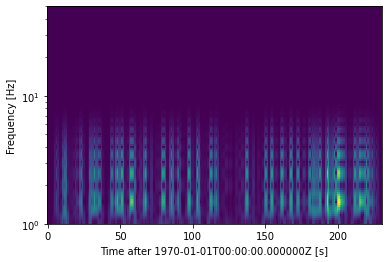

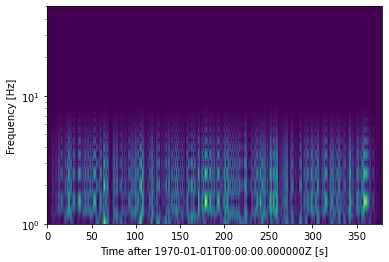

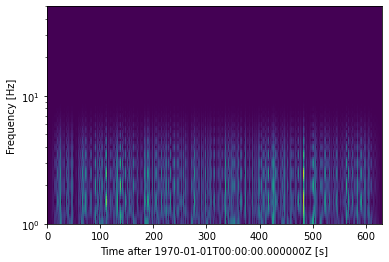

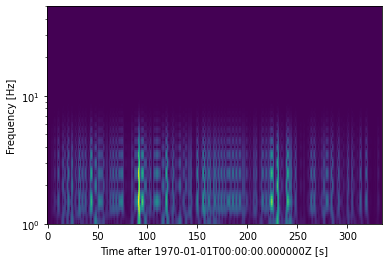

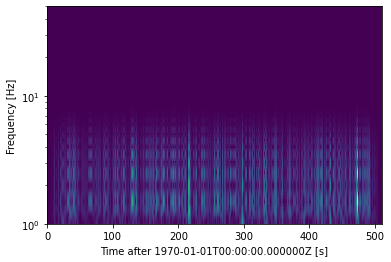

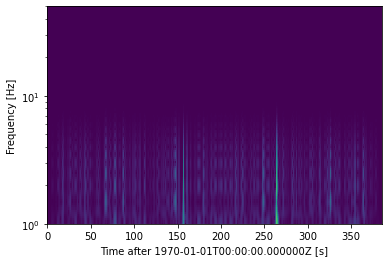

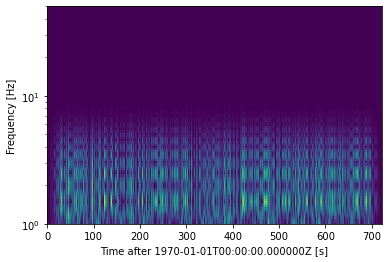

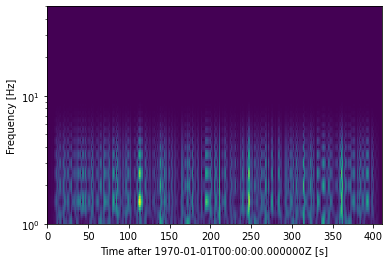

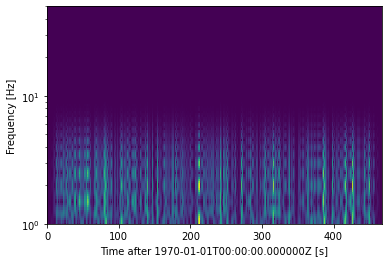

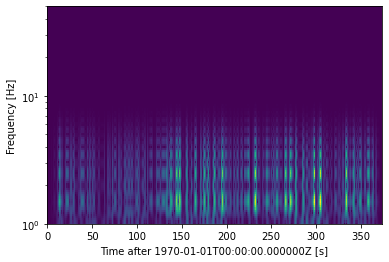

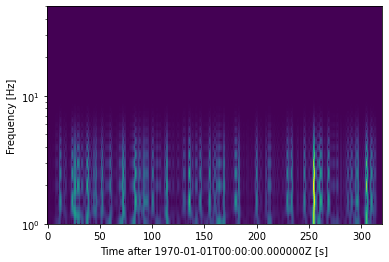

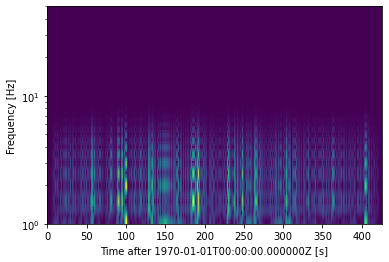

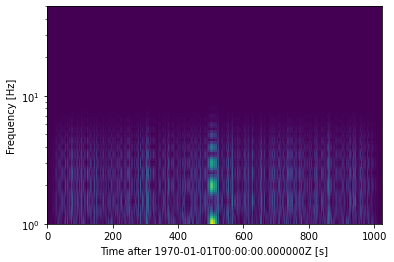

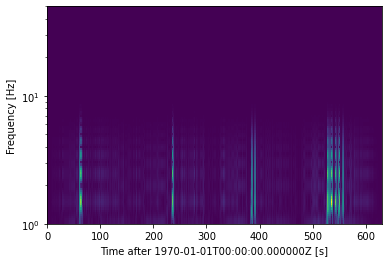

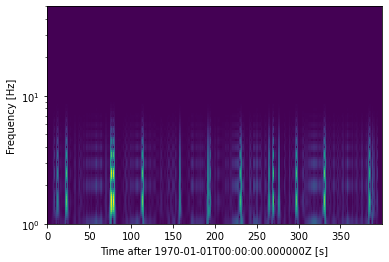

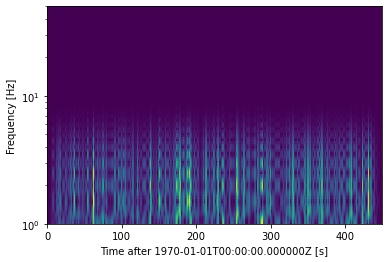

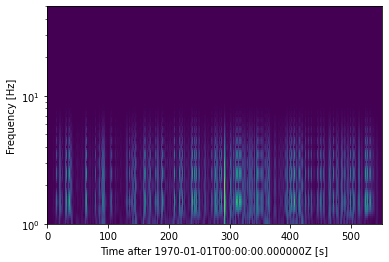

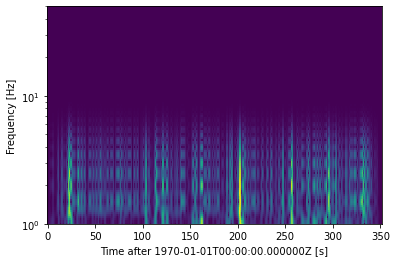

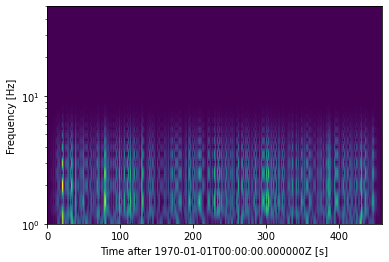

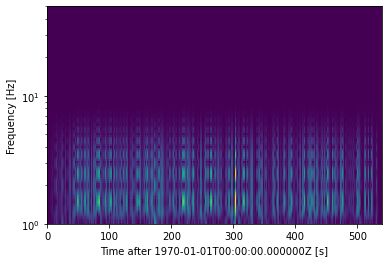

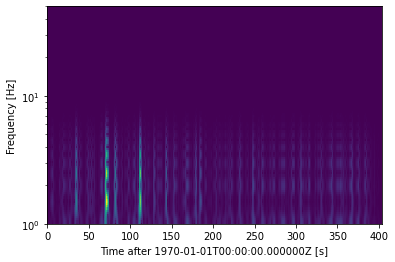

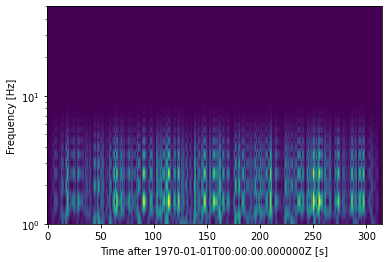

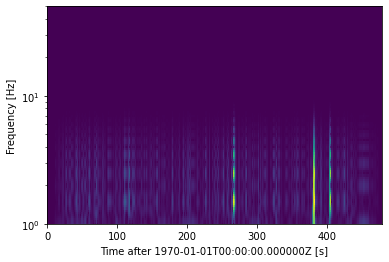

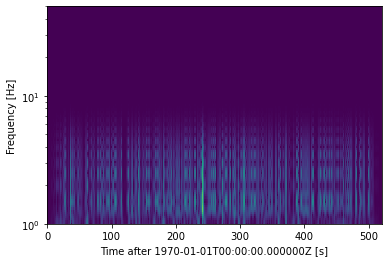

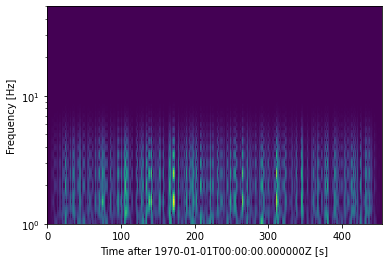

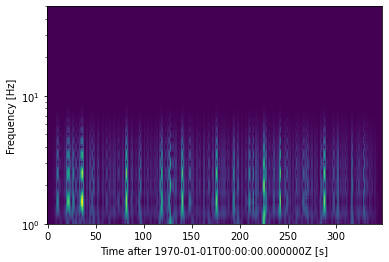

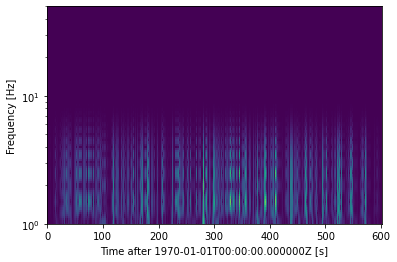

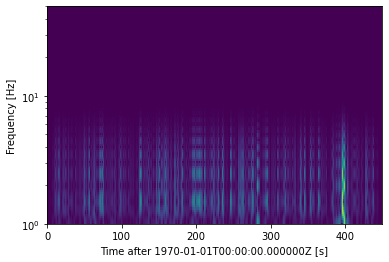

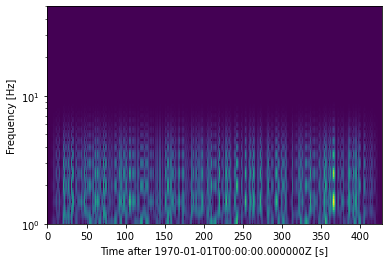

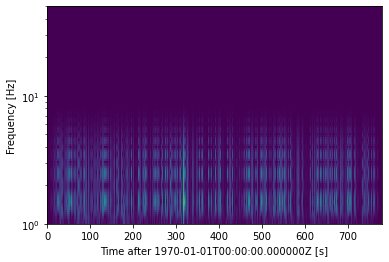

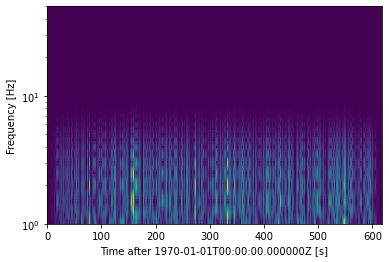

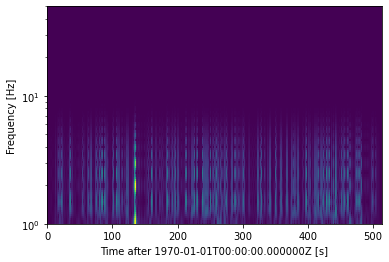

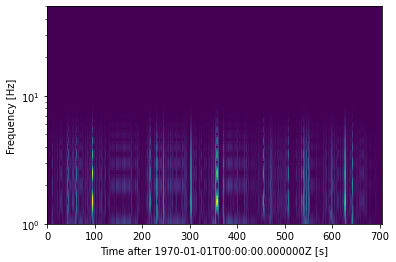

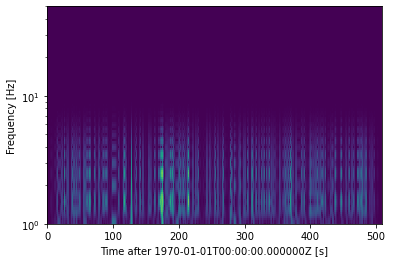

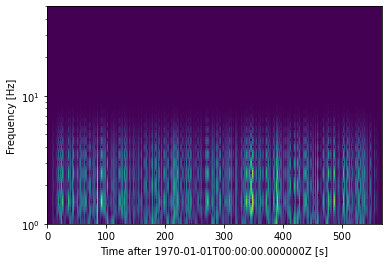

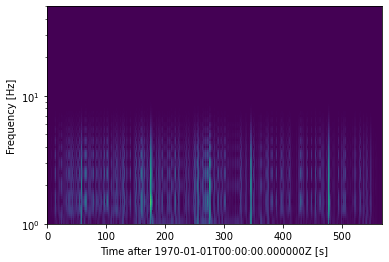

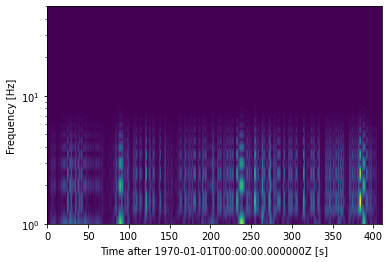

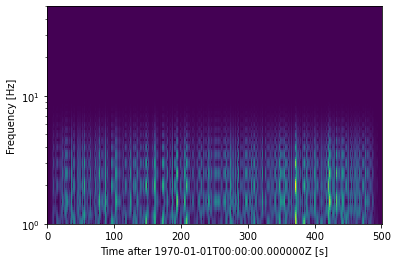

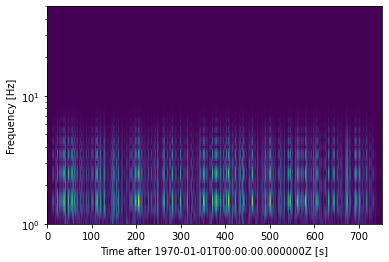

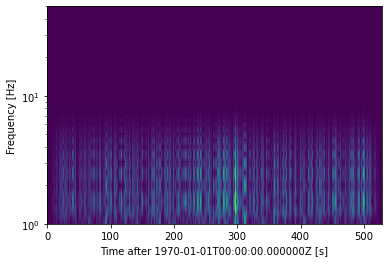

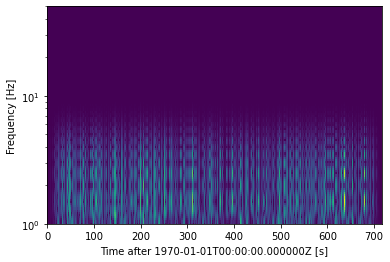

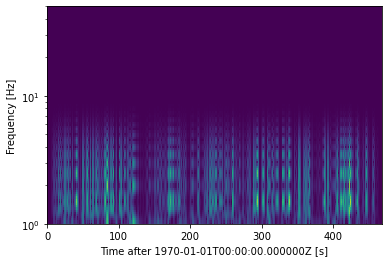

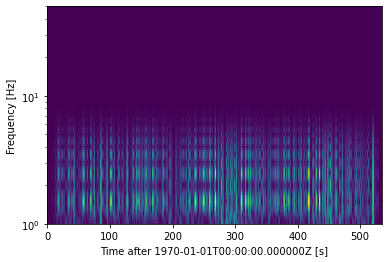

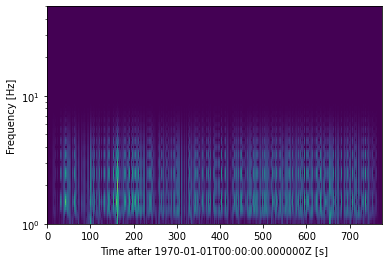

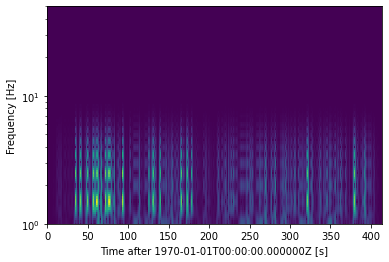

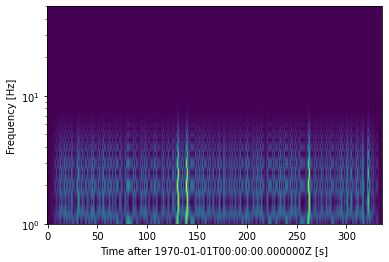

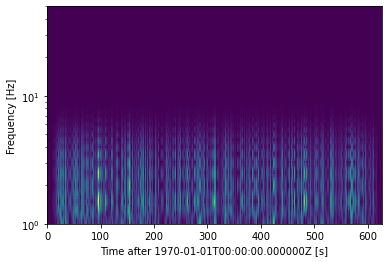

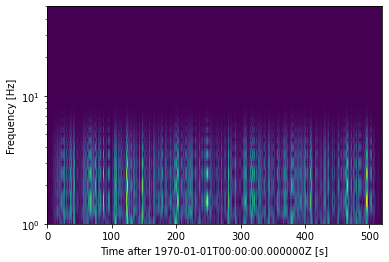

In [19]:
scalogram(signal = z)